In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

def grid(X, y, verbose=None):
    """
    for regression: 
        option 1 = LinearRegression
        option 2 = PolynomialFeatures
        option 3 = SVM - SVR
        option 4 = RandomForestRegressor
        option 5 = LogisticRegression
        option 6 = KNeighborsClassifier
        option 7 = svm - SVC
        option 8 = RandomForestClassifier()
        option 9 = XGBClassifier()
    """
    if verbose:
        verbose = 10
    option = int(input("Which model do you want to use? 1 = LinearRegression, 2 = PolynomialFeatures, 3 = SVM - SVR, 4 =  RandomForestRegressor, 5 = LogisticRegression, 6 = KNeighborsClassifier,  7 = svm - SVC, 8 = RandomForestClassifier, 9 = XGBClassifier"))
    
    if option == 1:
        new_model = LinearRegression()

        param_grid = [
        {'fit_intercept' : [True, False],
            'normalize' : [True, False],
            'copy_X' : [True, False]
        }
        ]
        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')

        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_

    elif option == 2:
        
        new_model = PolynomialFeatures()
        X_poly = new_model.fit_transform(X, y)

        param_grid = [
        {'degree' : np.logspace(2, 4, 6, 8),
            'interaction_only' :[True, False],
            'include_bias' : [True, False]}
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
        best_clf = clf.fit(X_poly, y)
        return best_clf.best_estimator_

    elif option == 3:
        
        new_model = SVR()

        param_grid = [
        {'kernel' : ['linear', 'poly', 'rbf'],
            'degree' : [2, 4, 6],
             'C': [0.5, 1.0, 2.0]}
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=10)
        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_

    elif option == 4:
        
        new_model = RandomForestRegressor()

        param_grid = [
        {'n_estimators' : [44, 45, 47, 49, 50, 51, 53, 55],
            'max_depth' : [None, 1, 3],
            'max_features' : ['auto', 'sqrt', 'log2'],
             'warm_start': [True, False],
             #'criterion' : ['mse', 'mae'],
             'bootstrap' : [True, False],
             'oob_score' : [True, False]
             }
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=10)
        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_
    
    elif option == 5:
        
        new_model = LogisticRegression()

        param_grid = [
        {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'C' : np.logspace(0, 4, 10),
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'warm_start': [True, False]}
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1)
        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_

    elif option == 6:
        
        new_model = KNeighborsClassifier()

        param_grid = [
        {'n_neighbors' : [7, 8, 9, 10, 11],
            'weights' : ['uniform', 'distance'],
            'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1)
        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_
    
    elif option == 7:
        
        new_model = SVC()

        param_grid = [
        {'kernel' : [7, 8, 9, 10, 11],
            'weights' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'C' : [-1, 1, 3]}
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1)
        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_

    elif option == 8:
        
        new_model = RandomForestClassifier()

        param_grid = [
        {'n_estimators' : [50, 100, 200],
            'criterion' : ['gini', 'entropy'],
            'warm_start': [True, False],
            'max_features': ['auto', 'sqrt', 'log2']}
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1)
        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_

    elif option == 9:
        
        new_model = XGBClassifier()

        param_grid = [
        {'booster' : ['gbtree', 'gblinear','dart'],
            'max_delta_step':[0.1, 0, 1.],
            'max_depth': [6, 8, 10]}
        ]

        clf = GridSearchCV(new_model, param_grid=param_grid, cv=3, n_jobs=-1)
        best_clf = clf.fit(X, y)
        return best_clf.best_estimator_


   
      

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../../../")
print(sys.path)

['c:\\Users\\Roxan\\OneDrive\\Documentos\\My_map_2\\Data-science-bootcamp\\Curso\\week_10\\day5', 'c:\\Users\\Roxan\\.vscode\\extensions\\ms-python.python-2020.8.109390\\pythonFiles\\vscode_datascience_helpers\\..\\.does-not-exist', 'c:\\Users\\Roxan\\.vscode\\extensions\\ms-python.python-2020.8.109390\\pythonFiles', 'c:\\Users\\Roxan\\.vscode\\extensions\\ms-python.python-2020.8.109390\\pythonFiles\\lib\\python', 'C:\\Program Files\\Python38\\python38.zip', 'C:\\Program Files\\Python38\\DLLs', 'C:\\Program Files\\Python38\\lib', 'C:\\Program Files\\Python38', '', 'C:\\Users\\Roxan\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\Roxan\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32', 'C:\\Users\\Roxan\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32\\lib', 'C:\\Users\\Roxan\\AppData\\Roaming\\Python\\Python38\\site-packages\\Pythonwin', 'C:\\Program Files\\Python38\\lib\\site-packages', 'C:\\Users\\Roxan\\AppData\\Roaming\\Python\\Python38\\site-pack

In [14]:
from Utils.ML_creating_training_models import main
from Utils.cleaning_function import my_transformation

In [4]:
df = pd.read_csv("train_set.csv")

In [83]:
df

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,price
0,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,8,45,9,50,1,31.1
1,MADRID,ZARAGOZA,AVE,Turista,Promo,11,30,12,51,4,44.0
2,MADRID,ZARAGOZA,AVE,Turista,Flexible,8,20,9,35,2,55.7
3,MADRID,TARRAGONA,AVE,Turista,Flexible,7,30,10,3,2,82.6
4,VALLADOLID,MADRID,AVANT,Turista,Adulto ida,20,35,21,40,4,31.1
...,...,...,...,...,...,...,...,...,...,...,...
19447,ZARAGOZA,MADRID,AVE,Turista,Promo,7,48,9,15,1,44.0
19448,MADRID,TARRAGONA,AVE,Turista,Flexible,9,30,11,57,3,82.6
19449,MADRID,ZARAGOZA,AVE,Turista,Flexible,16,30,17,45,4,55.7
19450,TARRAGONA,MADRID,AVE,Turista,Flexible,10,33,13,10,1,82.6


In [84]:
#No NAN values
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
origin               0
destination          0
train_type           0
train_class          0
fare                 0
start_date_hour      0
start_date_minute    0
end_date_hour        0
end_date_minute      0
date_day             0
price                0
dtype: int64


In [85]:
df.shape

(19452, 11)

In [86]:
df[df.duplicated() == True]

,origin,destination,train_type,train_class,fare,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,price
45,MADRID,TARRAGONA,AVE,Turista,Flexible,17,30,20,3,5,82.60
61,MADRID,BARCELONA,AVE,Turista,Promo +,6,30,9,20,3,91.50
76,MADRID,BARCELONA,AVE,Turista,Promo +,6,30,9,20,3,91.50
91,MADRID,TARRAGONA,AVE,Turista,Promo +,5,50,8,17,5,48.75
98,ZARAGOZA,MADRID,AVE,Turista,Flexible,8,31,9,50,1,55.70
...,...,...,...,...,...,...,...,...,...,...,...
19447,ZARAGOZA,MADRID,AVE,Turista,Promo,7,48,9,15,1,44.00
19448,MADRID,TARRAGONA,AVE,Turista,Flexible,9,30,11,57,3,82.60
19449,MADRID,ZARAGOZA,AVE,Turista,Flexible,16,30,17,45,4,55.70
19450,TARRAGONA,MADRID,AVE,Turista,Flexible,10,33,13,10,1,82.60


In [87]:
df = my_transformation(df=df, norm=False, drop_nans=False, drop_dupl=False, my_decision=0)

In [44]:
df.dtypes

start_date_hour        int64
start_date_minute      int64
end_date_hour          int64
end_date_minute        int64
date_day               int64
price                float64
origin                 int32
destination            int32
train_type             int32
train_class            int32
fare                   int32
dtype: object

In [45]:
from sklearn.model_selection import train_test_split
import seaborn as sns

In [12]:
df.corr()

,start_date_hour,start_date_minute,end_date_hour,end_date_minute,date_day,price,origin,destination,train_type,train_class,fare
start_date_hour,1.000000,-0.071659,0.726133,-0.066545,0.069821,-0.120048,0.046794,0.059225,0.029034,-0.001475,-0.045896
start_date_minute,-0.071659,1.000000,-0.054362,0.053842,-0.012634,-0.299961,0.391694,0.099270,0.073953,0.042279,-0.229660
end_date_hour,0.726133,-0.054362,1.000000,-0.024374,0.062709,0.029278,-0.055993,0.001347,0.086867,0.000232,-0.066709
end_date_minute,-0.066545,0.053842,-0.024374,1.000000,0.004938,-0.066428,-0.071977,0.202670,-0.009157,0.057252,-0.061605
date_day,0.069821,-0.012634,0.062709,0.004938,1.000000,0.058292,0.020838,0.013341,-0.032349,-0.082145,0.057783
price,-0.120048,-0.299961,0.029278,-0.066428,0.058292,1.000000,-0.444388,-0.455107,-0.218092,-0.043020,0.641347
origin,0.046794,0.391694,-0.055993,-0.071977,0.020838,-0.444388,1.000000,-0.144913,-0.045514,-0.068541,-0.272006
destination,0.059225,0.099270,0.001347,0.202670,0.013341,-0.455107,-0.144913,1.000000,-0.015223,0.080418,-0.263292
train_type,0.029034,0.073953,0.086867,-0.009157,-0.032349,-0.218092,-0.045514,-0.015223,1.000000,0.004990,-0.162450
train_class,-0.001475,0.042279,0.000232,0.057252,-0.082145,-0.043020,-0.068541,0.080418,0.004990,1.000000,-0.015423


In [6]:
#Define X, Y

y = df.price.values
X = df.drop("price", axis=1)

In [16]:
#Trying dummies instead of labelencoder
X = pd.get_dummies(X).values

In [51]:
#Trying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(X)
X = pca.transform(X)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [90]:
X_train.shape

(15561, 10)

In [10]:
grid(X=X, y=y, verbose=True)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   55.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 

RandomForestRegressor(bootstrap=False, n_estimators=49, warm_start=True)

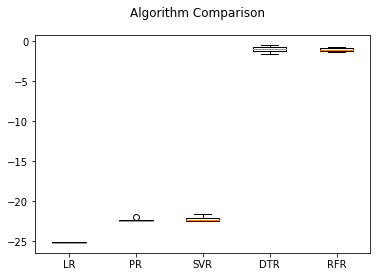

In [16]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import numpy as np

# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('PR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))


# evaluate each model in turn
results = []
names = []
scoring = 'neg_root_mean_squared_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, random_state=seed)
    if name == 'PR':
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X_train)
        cv_results = model_selection.cross_val_score(model, X_poly, y_train.ravel(), cv=kfold, scoring=scoring)
    else:
        cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)

    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [17]:
main(df=df, X_values=X)

score of model: 0.9998059078428377
Saved successfully


RandomForestRegressor(n_estimators=49, warm_start=True)

In [45]:
import pickle

with open(file="try_5.sav", mode="rb") as model_save:
    model = pickle.load(model_save)
type(model)

sklearn.ensemble._forest.RandomForestRegressor

In [46]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 30 

In [37]:
from sklearn.model_selection import RepeatedKFold, KFold
n_splits_x_test = 10
# val es un trozo que nunca se repite
for (_, one_split) in KFold(n_splits=n_splits_x_test).split(X_test):
    y_pred = model3.predict(X_test[one_split])
    print(mean_squared_error(y_test[one_split], y_pred))

0.01522400601324165
0.03079690394835432
0.05362303340540265
0.005545936578889917
0.016292967556228055
0.08933409926825668
0.0009994744228309807
0.03234138597124785
0.006075717133777136
0.039579646922259765


## Making prediction

In [38]:
to_pred = pd.read_csv("test_set.csv")

In [39]:
to_pred = pd.get_dummies(to_pred)

In [148]:
to_pred = my_transformation(df=to_pred, norm=False, drop_nans=False, drop_dupl=False, my_decision=0)

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.999)
pca.fit(to_pred)
to_pred = pca.transform(to_pred)

In [40]:
predictions = model3.predict(to_pred)

In [41]:
sample = pd.read_csv("sample_submission.csv")
sample

,id,price
0,18019,58.80
1,10977,20.00
2,3461,86.05
3,9964,82.60
4,35955,61.95
...,...,...
29175,25614,31.10
29176,35667,35.00
29177,38049,74.40
29178,20679,24.95


In [42]:
submission = pd.DataFrame({"id": sample["id"], "price": predictions})
submission

,id,price
0,18019,101.500000
1,10977,81.700000
2,3461,31.100000
3,9964,30.100000
4,35955,86.050000
...,...,...
29175,25614,31.100000
29176,35667,80.550000
29177,38049,31.100000
29178,20679,91.494801


In [43]:
if submission.shape == sample.shape:
    if submission.columns.all() == sample.columns.all():
        if submission.id.all() == sample.id.all():
            print("you're ready to submit!")
            submission.to_csv("17th_try_to_submit.csv", index = False)
            # ¡¡¡¡¡¡¡ADD INDEX = FALSE!!!!!!!!!

you're ready to submit!
